In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Data GDP Indonesia

In [2]:
df = pd.read_csv('API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_5454826.csv',skiprows=range(0,4))
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.020479,3.543630,2.116716,5.482371,5.257856,0.635029,-18.589100,17.172509,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.237304,7.984460,5.163873,4.583677,5.328044,...,4.039082,2.895728,2.485952,2.639537,2.610797,2.038299,-3.042653,4.402447,NaN,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.737146,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.835056,3.772898,7.282985,5.392705,4.056588,...,5.930450,2.745137,0.113687,2.305623,2.946175,3.190879,-0.900382,3.965399,NaN,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.820000,0.940000,-2.580000,-0.150000,-1.316312,-0.700000,-5.600000,1.100000,NaN,NaN


In [3]:
ind = df[df['Country Name']=='Indonesia']
ind = ind.T
ind = ind.reset_index()

In [4]:
ind = ind.rename(columns={'index':'year',106:'Ind-GDP-growth'})
ind

,year,Ind-GDP-growth
0,Country Name,Indonesia
1,Country Code,IDN
2,Indicator Name,GDP growth (annual %)
3,Indicator Code,NY.GDP.MKTP.KD.ZG
4,1960,NaN
...,...,...
63,2019,5.019288
64,2020,-2.065005
65,2021,3.69124
66,2022,NaN


In [5]:
ind = ind.drop(index=67)
ind = ind.drop(index=range(0,4))

In [6]:
ind = ind.reset_index().drop(columns='index')

In [7]:
ind[ind['Ind-GDP-growth'].isna()]

,year,Ind-GDP-growth
0,1960,NaN
62,2022,NaN


In [8]:
ind

,year,Ind-GDP-growth
0,1960,NaN
1,1961,5.740646
2,1962,1.841978
3,1963,-2.23703
4,1964,3.529698
...,...,...
58,2018,5.174292
59,2019,5.019288
60,2020,-2.065005
61,2021,3.69124


In [9]:
ind['Ind-GDP-growth'].loc[62]=5.31
ind = ind.dropna()

In [10]:
ind

,year,Ind-GDP-growth
1,1961,5.740646
2,1962,1.841978
3,1963,-2.23703
4,1964,3.529698
5,1965,1.081589
...,...,...
58,2018,5.174292
59,2019,5.019288
60,2020,-2.065005
61,2021,3.69124


In [11]:
# Mengubah tipe data year dan Ind-GDP-growth
ind['Ind-GDP-growth'] = ind['Ind-GDP-growth'].astype(float)
ind['year'] = pd.to_datetime(ind['year'], format='%Y').dt.year

C:\Users\Afra\AppData\Local\Temp\ipykernel_35876\3083299553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['Ind-GDP-growth'] = ind['Ind-GDP-growth'].astype(float)
C:\Users\Afra\AppData\Local\Temp\ipykernel_35876\3083299553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['year'] = pd.to_datetime(ind['year'], format='%Y').dt.year


In [12]:
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            62 non-null     int64  
 1   Ind-GDP-growth  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


## EDA

### Pada tahun berapa Indonesia Mengalami keanaikan GDP yang tertinggi dan terendah

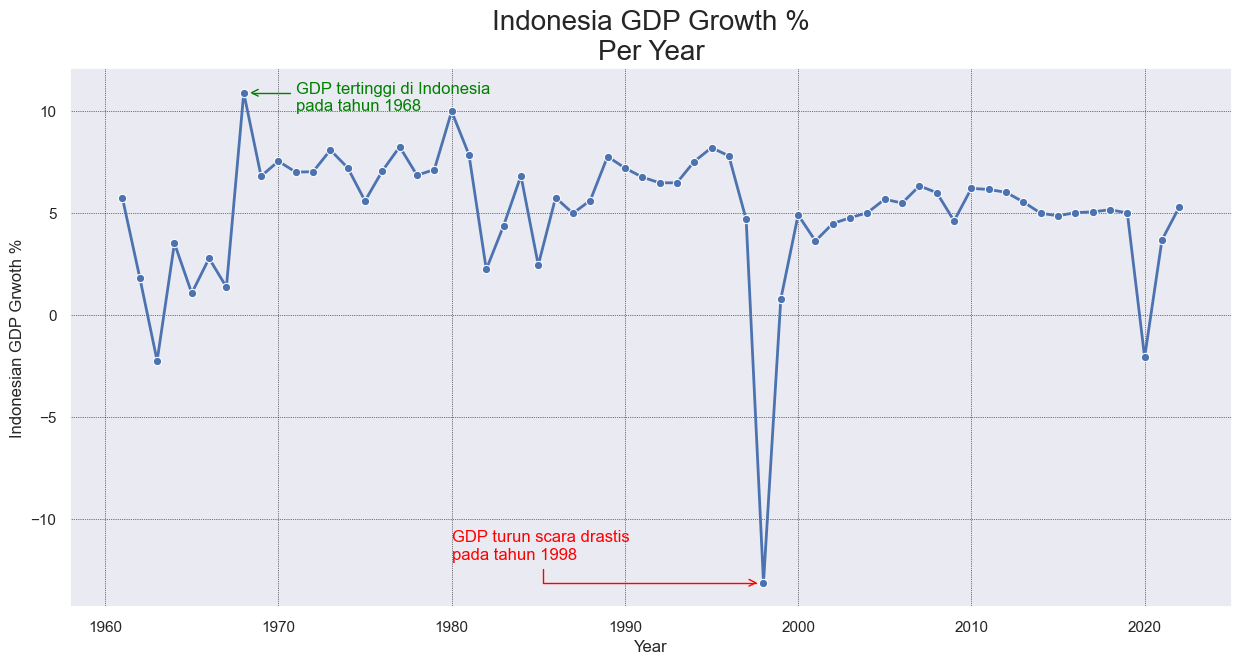

In [13]:
plt.figure(figsize=(15,7))


sns.lineplot(x='year',y='Ind-GDP-growth',data=ind,markers=True,marker='o',linewidth=2)
plt.title('Indonesia GDP Growth %\nPer Year',fontsize=20)
plt.ylabel('Indonesian GDP Grwoth %',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.grid(color='black', linestyle=':', linewidth=0.5)
#Anotasi1
plt.annotate('GDP turun scara drastis \npada tahun 1998',xy=(1997.8, -13.126725),xytext=(1980,-12),color='red',
            arrowprops=dict(arrowstyle='->',connectionstyle='angle',color='red'))

#Anotasi2
plt.annotate('GDP tertinggi di Indonesia \npada tahun 1968',xy=(1968.2, 10.915179),xytext=(1971,10),color='green',
            arrowprops=dict(arrowstyle='->',connectionstyle='angle',color='green'))

# plt.savefig('tren-gdp-ind.png', bbox_inches='tight', dpi=300)
plt.show()

In [32]:
q1 = ind['Ind-GDP-growth'].quantile(0.25)
q3 = ind['Ind-GDP-growth'].quantile(0.75)
iqr = q3 - q1
print('Quartil 1 = ',q1)
print('Quartil 3 = ',q3)
print('Nilai Interquartil = ',iqr)

low_in = q3 - 1.5 * iqr
up_in = q3 + 1.5 * iqr

print('lower inner fence =',round(low_in,2))
print('upper inner fence =',round(up_in,2))

Quartil 1 =  4.646623100397139
Quartil 3 =  6.9855551494645125
Nilai Interquartil =  2.338932049067373
lower inner fence = 3.48
upper inner fence = 10.49


In [34]:
ind = ind[(ind['Ind-GDP-growth']<up_in)&(ind['Ind-GDP-growth']>low_in)]

## Modeling and Evaluating

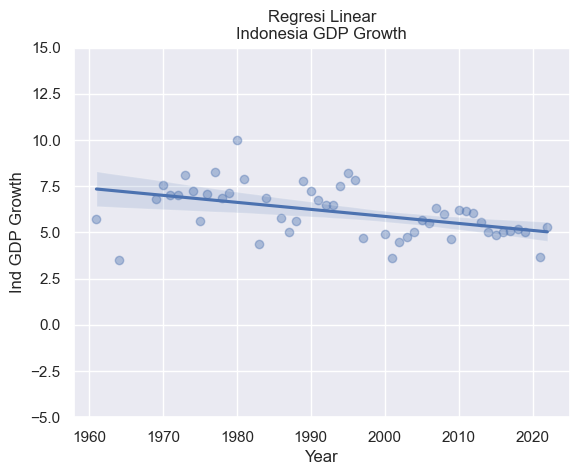

In [44]:
sns.regplot(x='year',y='Ind-GDP-growth',data=ind, scatter_kws={'alpha': 0.4})
plt.xlabel('Year')
plt.ylabel('Ind GDP Growth')
plt.title('Regresi Linear\nIndonesia GDP Growth')
plt.ylim(ymin=-5,ymax=15)

# plt.savefig('regplot-indGDP-clean.png', bbox_inches='tight', dpi=300)
plt.show()

In [36]:
# MSE of linear models
# MSE (Mean Square Error) digunakan untuk menghitung nilai error dari regresinya

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_mse(ind, feature, target='Ind-GDP-growth'):
    # Get x, y to model
    y = ind[target].values
    x = ind[feature].values.reshape(-1,1)
    print('{} ~ {}'.format(target, feature))
    
    # Build and fit the model
    lm = LinearRegression()
    lm.fit(x, y)
    msg = 'model: y = {:.3f} + {:.3f}x'\
            .format(lm.intercept_, lm.coef_[0])
    print(msg)
    
    # Predict and determine MSE
    y_pred = lm.predict(x)
    error = mean_squared_error(y, y_pred)
    print('mse = {:.2f}'.format(error))
    print()

In [37]:
y = ind['Ind-GDP-growth'].values
x = ind['year'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(x, y)

lm.predict(np.array([2023]).reshape(-1,1))

array([4.99562256])

In [38]:
get_mse(ind, 'year')

Ind-GDP-growth ~ year
model: y = 81.835 + -0.038x
mse = 1.42



# Regresi Polynomial

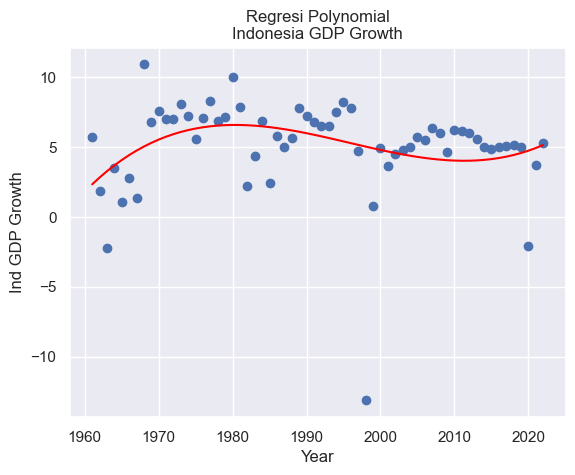

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = ind[['year']]
y = ind['Ind-GDP-growth']

# Mengubah fitur menjadi matriks polinomial
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# Melakukan regresi polinomial
regressor = LinearRegression()
regressor.fit(x_poly, y)

# Memprediksi nilai y menggunakan model regresi polinomial
y_pred = regressor.predict(x_poly)

# Menampilkan hasil regresi polinomial
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Ind GDP Growth')
plt.title('Regresi Polynomial\nIndonesia GDP Growth')
# plt.savefig('ploy-GDP.png', bbox_inches='tight', dpi=300)
plt.show()

In [19]:
x_0 = regressor.intercept_ + regressor.coef_[0] # intercept
x_1, x_2, x_3 = regressor.coef_[1:]
msg = 'model: y = {:.3f} + {:.3f}x + {:.3f}x^2 + {:.4f}x^3'.format(x_0, x_1, x_2, x_3)
print(msg)

model: y = -1371658.013 + 2062.043x + -1.033x^2 + 0.0002x^3


In [20]:
y_pred = regressor.predict(x_poly)
resid_MEDV = ind['Ind-GDP-growth'].values.reshape(-1,1) - y_pred

In [21]:
error = mean_squared_error(ind['Ind-GDP-growth'].values.reshape(-1,1), y_pred)
print('mse = {:.2f}'.format(error))

mse = 10.11


In [22]:
from sklearn.preprocessing import PolynomialFeatures

X = ind['year'].values.reshape(-1, 1)

# Buat polynomial features dengan derajat 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Buat model regresi linear
model = LinearRegression()
model.fit(X_poly, y)

# Lakukan prediksi menggunakan model
y_pred = model.predict(X_poly)

# Hitung MSE
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error (MSE): {mse}') 

# Mengubah nilai x = 2023 menjadi bentuk matriks polynomial
x_pred = poly_features.transform([[2023]])

# Melakukan prediksi menggunakan model
y_pred = model.predict(x_pred)

# Mencetak hasil prediksi
print(f'Prediksi untuk tahun 2023: {y_pred[0]}')


Mean Squared Error (MSE): 10.11083070461389
Prediksi untuk tahun 2023: 5.394021834013984


In [23]:
ind[ind['year']==2022]

,year,Ind-GDP-growth
62,2022,5.31


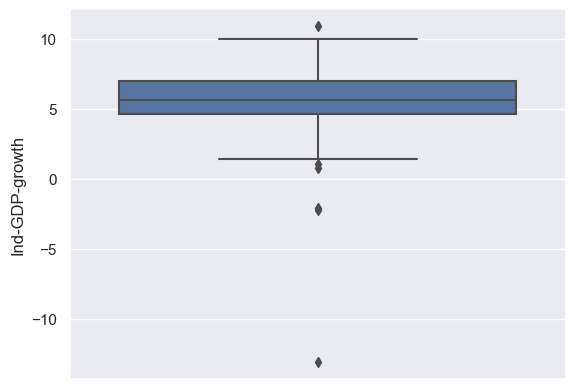

In [24]:
sns.boxplot(y='Ind-GDP-growth',data=ind)

# plt.savefig('boxplot-indGDP.png', bbox_inches='tight', dpi=300)
plt.show()

In [46]:
ind['Ind-GDP-growth'].describe()

count    51.000000
mean      6.094142
std       1.363832
min       3.529698
25%       5.025081
50%       6.013704
75%       7.058645
max      10.000000
Name: Ind-GDP-growth, dtype: float64